In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = {}

In [3]:
data["aerogerador"] = np.loadtxt("data/aerogerador.dat", delimiter="\t")
data["aerogerador"]

array([[  0. ,   0. ],
       [  0. ,   0. ],
       [  0. ,   0. ],
       ...,
       [ 14.1, 508. ],
       [ 14.3, 508. ],
       [ 14.4, 503. ]], shape=(2250, 2))

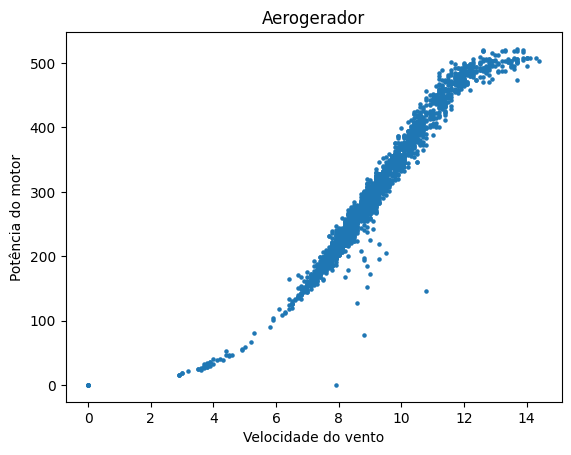

In [4]:
X = data["aerogerador"][:, 0]
Y = data["aerogerador"][:, 1]

plt.figure(1)
plt.title("Aerogerador")
plt.xlabel("Velocidade do vento")
plt.ylabel("Potência do motor")
plt.scatter(X, Y, s=5)

# Classificação 1

Text(0.5, 0, 'Z')

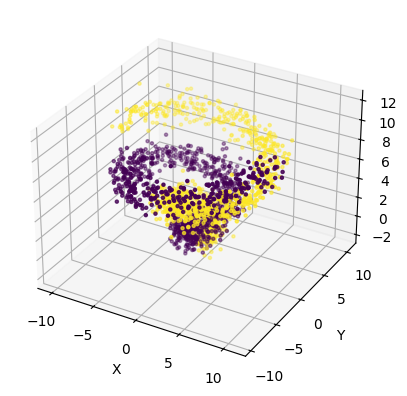

In [5]:
data = np.loadtxt("data/Spiral3d.csv", delimiter=",")
X = data[:, :3]
y = data[:, 3:]
# 3 dimensional scatter plot
fig = plt.figure(1)
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y[:, 0], s=5, cmap="viridis")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

## Perceptron Simples: 100 épocas

In [6]:
from models.perceptron import SimplePerceptron
from utils import import_weights


weights = import_weights("weights/perceptron_spiral3d.csv")
model = SimplePerceptron(w=weights)

(2000,)
(2000,)


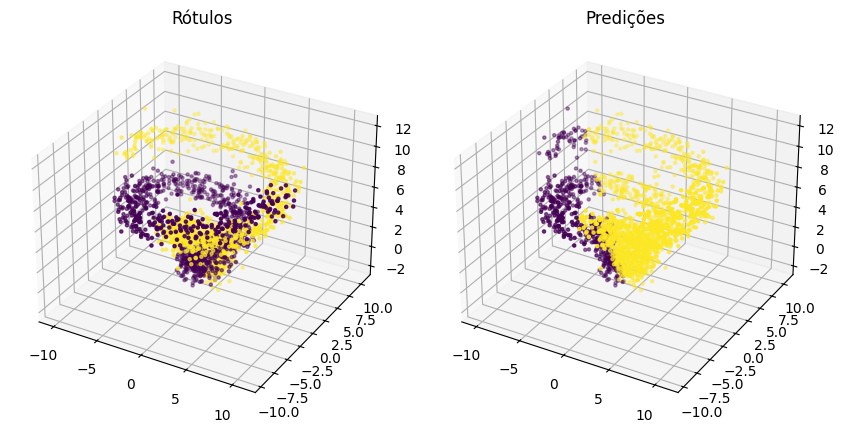

In [7]:
from utils import standardize


data = np.loadtxt("data/Spiral3d.csv", delimiter=",")
X = data[:, :3]
y = data[:, 3:]

# 3 dimensional scatter plot
fig = plt.figure(1, figsize=(20, 5))
ax = fig.add_subplot(1, 1, 1, projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y[:, 0], s=5, cmap="viridis")
ax.set_title("Rótulos")

X_s = standardize(X)
X_s = X_s.T
preds = model.predict(X_s)
preds = np.reshape(preds, (preds.shape[0], 1))

print(y[:, 0].shape)
print(preds[:, 0].shape)

ax = fig.add_subplot(1, 2, 2, projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=preds[:, 0], s=5, cmap="viridis")
ax.set_title("Predições")

plt.show()

## Perceptron de Múltiplas Camadas: 300 épocas

In [8]:
from models.mlp import MultilayerPerceptron
from utils import import_mlp, import_multilayer_weights

p, q, m, learning_rate, layers = import_mlp("weights/mlp_spiral3d")

model = MultilayerPerceptron(p, q, m, learning_rate)
for i in range(len(layers)):
    model.layers[i].w = layers[i]

weights = import_multilayer_weights(10, "weights/mlp_spiral3d_[50, 50, 50, 50, 50, 50, 50, 50, 50, 50]_0.75_0.001")
for i in range(len(model.layers)):
    model.layers[i].w = weights[i]

Imported weights of layer 0 from weights/mlp_spiral3d_[50, 50, 50, 50, 50, 50, 50, 50, 50, 50]_0.75_0.001_layer_0.csv
Imported weights of layer 1 from weights/mlp_spiral3d_[50, 50, 50, 50, 50, 50, 50, 50, 50, 50]_0.75_0.001_layer_1.csv
Imported weights of layer 2 from weights/mlp_spiral3d_[50, 50, 50, 50, 50, 50, 50, 50, 50, 50]_0.75_0.001_layer_2.csv
Imported weights of layer 3 from weights/mlp_spiral3d_[50, 50, 50, 50, 50, 50, 50, 50, 50, 50]_0.75_0.001_layer_3.csv
Imported weights of layer 4 from weights/mlp_spiral3d_[50, 50, 50, 50, 50, 50, 50, 50, 50, 50]_0.75_0.001_layer_4.csv
Imported weights of layer 5 from weights/mlp_spiral3d_[50, 50, 50, 50, 50, 50, 50, 50, 50, 50]_0.75_0.001_layer_5.csv
Imported weights of layer 6 from weights/mlp_spiral3d_[50, 50, 50, 50, 50, 50, 50, 50, 50, 50]_0.75_0.001_layer_6.csv
Imported weights of layer 7 from weights/mlp_spiral3d_[50, 50, 50, 50, 50, 50, 50, 50, 50, 50]_0.75_0.001_layer_7.csv
Imported weights of layer 8 from weights/mlp_spiral3d_[5

ValueError: cannot reshape array of size 50 into shape (2,1)

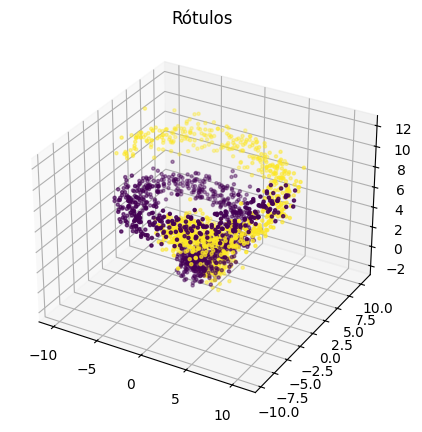

In [9]:
from utils import standardize


data = np.loadtxt("data/Spiral3d.csv", delimiter=",")
X = data[:, :3]
y = data[:, 3:]

# 3 dimensional scatter plot
fig = plt.figure(1, figsize=(20, 5))
ax = fig.add_subplot(1, 1, 1, projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y[:, 0], s=5, cmap="viridis")
ax.set_title("Rótulos")

X_s = standardize(X)
X_s = X_s.T
preds = model.predict(X_s).T
_preds = preds
_preds[preds == 0] = 1
preds[preds == 1] = 0
preds[_preds == 1] = 1
preds = np.reshape(preds, (preds.shape[0], 1))

print(y[:, 0].shape)
print(preds[:, 0].shape)

ax = fig.add_subplot(1, 2, 2, projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=preds[:, 0], s=5, cmap="viridis")
ax.set_title("Predições")

plt.show()